In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

C:\Users\lfdin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Informações sobre o dataset

Esse dataset foi construído a partir de informações em anúncios de venda de veículos disponíveis online, entre os dias 30/06/2022 e 04/07/2022. Na obtenção dos dados, foram procurados apenas anúncios profissionais de veículos com ano de fabricação a partir de 2000. Além disso, foi verificado no portal de vendas uma quantidade aproximadamente igual de anúncios entre as seguintes faixas de quilometragem: 0-30, 30-60, 60-100, 100+. Sendo assim, de forma a tornar a amostragem realizada mais representativa, os valores de quilometragem nesse dataset seguem uma proporção parecida.

In [2]:
df = pd.read_csv('cars_data_cleaned.csv')

df.head()

,Marca,Descricao,Tipo,Ano,UF,Km,Potencia,Combustivel,Cambio,Direcao,...,TravaEletrica,VidroEletrico,Som,SensorDeRe,CameraDeRe,Blindado,Preco,Modelo,Dias,KmLimite
0,ALFA ROMEO,ALFA ROMEO 156 TS/SPORT/ELEGANT 2.0 16V,NaN,2012,AM,1,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,50000.0,156,4021,1407350
1,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,NaN,Diesel,Automático,NaN,...,False,True,True,True,True,False,139800.0,COMPASS,2194,767900
2,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,True,True,True,False,False,False,49900.0,SAVEIRO,3290,1151500
3,TOYOTA,TOYOTA ETIOS,Sedã,2015,PA,1000,1.5,Flex,Manual,Hidráulica,...,True,True,True,True,False,False,47900.0,ETIOS,2925,1023750
4,VW - VOLKSWAGEN,VW - VOLKSWAGEN POLO COMFORT. 200 TSI 1.0 FLEX...,NaN,2021,PR,11139,1.0,Flex,Automático,Hidráulica,...,True,True,False,True,False,False,98900.0,POLO,733,256550


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5212 entries, 0 to 5211
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Marca           5207 non-null   object 
 1   Descricao       5212 non-null   object 
 2   Tipo            4288 non-null   object 
 3   Ano             5212 non-null   int64  
 4   UF              5212 non-null   object 
 5   Km              5212 non-null   int64  
 6   Potencia        3964 non-null   object 
 7   Combustivel     5162 non-null   object 
 8   Cambio          5183 non-null   object 
 9   Direcao         4094 non-null   object 
 10  Cor             4327 non-null   object 
 11  FinalDePlaca    4433 non-null   float64
 12  Portas          5067 non-null   object 
 13  UnicoDono       2962 non-null   object 
 14  AceitaTrocas    3357 non-null   object 
 15  ArCondicionado  5212 non-null   bool   
 16  AirBag          5212 non-null   bool   
 17  Alarme          5212 non-null   b

# Analisando a relação das features com a target

## Features numéricas

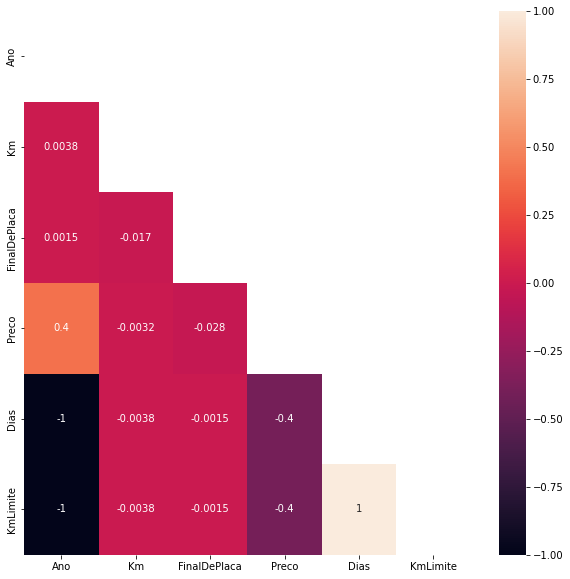

In [4]:
var_num = df.select_dtypes(['int', 'float']).columns

plt.figure(figsize=(10,10))
sns.heatmap(df[var_num].corr(), vmin=-1, vmax=+1, annot=True, mask=np.triu(df[var_num].corr()));

Da matriz de correlação acima, as seguintes conclusões podem ser obtidas:

- As variáveis `Dias` e `KmLimite` são derivadas da variável `Ano`, e portanto é esperado que a correlação entre as três seja perfeita;
- Conforme esperado, não existe uma correlação entre a quilometragem do carro e o final da placa do mesmo;
- Não existe uma correlação significativa entre o final da placa de um carro e o preço do mesmo;
- Não existe uma correlação significativa entre a quilometragem do carro e o preço do mesmo;
- **Existe uma correlação moderada (0.4)** entre o **ano** do modelo do carro e o **preço** do mesmo. Conforme esperado, existe uma têndencia de um preço maior do veículo quanto mais recente o ano do modelo do mesmo.

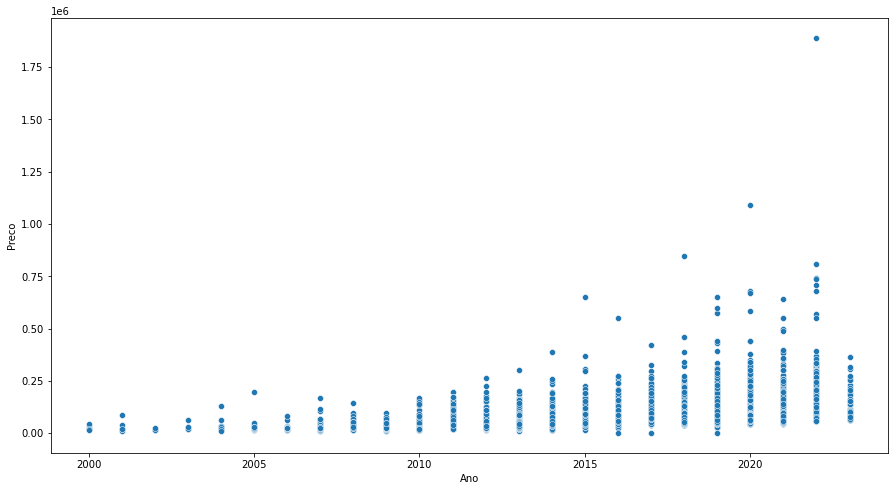

In [5]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Ano', y='Preco', data=df);

## Features booleanas

In [6]:
var_bool = df.select_dtypes(['bool']).columns

len(var_bool)

9

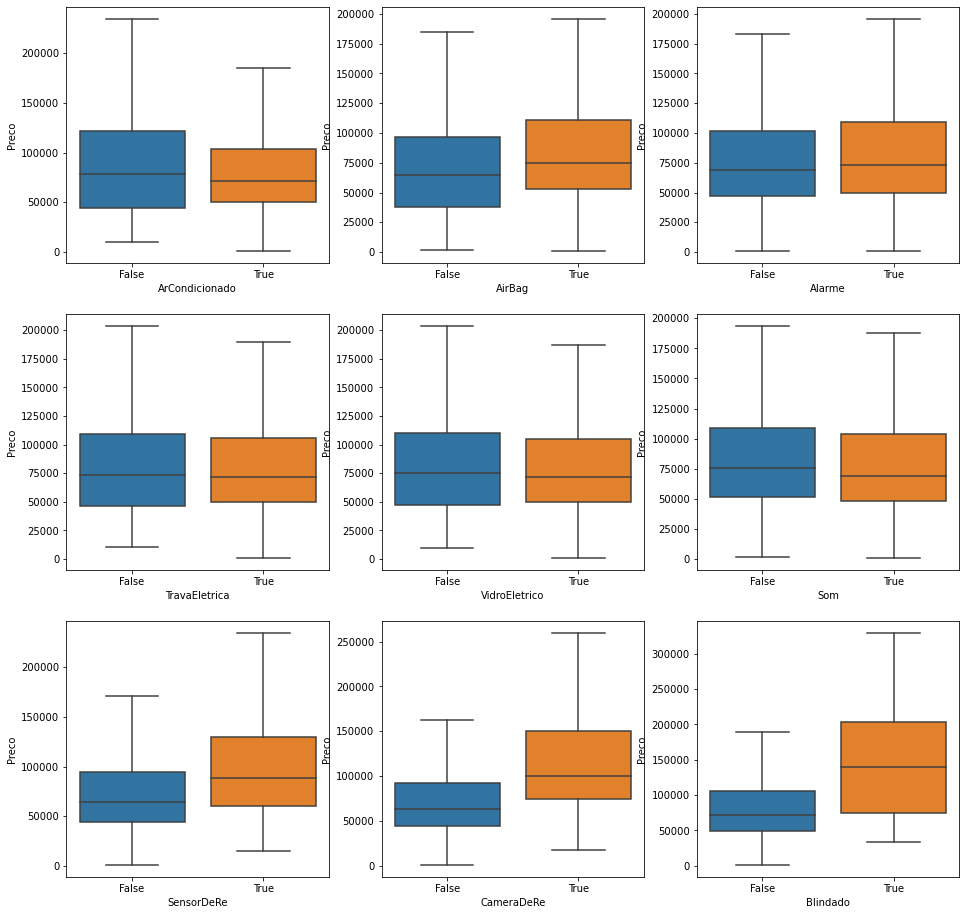

In [7]:
fig, axes = plt.subplot_mosaic([["top left", "top center", "top right"],
                                ["middle left", "middle center", "middle right"],
                                ["bottom left", "bottom center", "bottom right"]], 
                               figsize=(16,16))

axes_list = ["top left", "top center", "top right", 
             "middle left", "middle center", "middle right",
             "bottom left", "bottom center", "bottom right"]

for i, var in enumerate(var_bool):
    sns.boxplot(x=df[var],y=df['Preco'], showfliers=False, ax=axes[axes_list[i]]);

In [8]:
df_bool = pd.DataFrame(columns=['Feature', 'True_(Media)', 'False_(Media)', 'True_(Mediana)', 'False_(Mediana)'])

for var in var_bool:
    true_mean = df.groupby(var)['Preco'].mean()[True]
    false_mean = df.groupby(var)['Preco'].mean()[False]
    true_median = df.groupby(var)['Preco'].median()[True]
    false_median = df.groupby(var)['Preco'].median()[False]
    df_bool = df_bool.append({'Feature':var, 'True_(Media)':true_mean, 'False_(Media)':false_mean,
                              'True_(Mediana)':true_median, 'False_(Mediana)':false_median}, ignore_index=True)
    
df_bool

,Feature,True_(Media),False_(Media),True_(Mediana),False_(Mediana)
0,ArCondicionado,89430.065062,98233.708564,71000.0,78760.0
1,AirBag,94184.976775,81248.390724,74800.0,64900.0
2,Alarme,91959.019783,87486.566360,73065.0,68900.0
3,TravaEletrica,89766.446281,95164.365654,71900.0,73445.0
4,VidroEletrico,89902.765308,94677.031746,71890.0,74990.0
5,Som,87936.282150,93920.827557,68900.0,75900.0
6,SensorDeRe,108895.350291,80300.093534,88990.0,63890.0
7,CameraDeRe,123159.509531,79130.396570,99900.0,62900.0
8,Blindado,149833.431034,89987.000000,139400.0,71900.0


Em geral é esperado que a presença de itens opcionais aumente o valor do carro. No entanto, o seguinte foi observado:

- Os carros que possuem os itens `ArCondicionado`, `TravaEletrica`, `VidroEletrico` e `Som` tem preço levemente menor que aqueles que não possuem. Uma suposição levantada é que esses itens são mais básicos e populares, podendo ser negligenciados pelos anunciantes ao preencher as informações dos veículos;

- Os carros que possuem os itens `SensorDeRe`, `CameraDeRe` e `Blindado` tem preço bastante superior àqueles que não possuem, com diferenças superiores a 25 mil reais nas médias e medianas;

- Os carros que possuem os itens `AirBag` e `Alarme` tem preços superiores àqueles que não possuem, seguindo o padrão esperado antes da análise dos dados.

Para verificar se as diferenças observadas acima são estatisticamente significativas, um teste estatístico será aplicado. Cada uma das variáveis booleanas é dividida em dois grupos independentes: os que possuem determinado item (True) e aqueles que não possuem (False). Já a variável dependente, o preço do veículo, é do tipo quantitativa. Para esse caso, temos dois tipos de teste possíveis, de acordo com a distribuição da variável quantitativa: o teste t de Student e o teste de Mann-Whitney.

Para verificar a normalidade do preço do veículo, o teste de Shapiro-Wilk será aplicado. A hipótese nula desse teste é que a amostra segue uma distribuição normal, sendo rejeitada para um nível de significância de 0,05.

In [9]:
from scipy.stats import shapiro

stats, pvalue = shapiro(df['Preco'])
print('p-valor: '+str(pvalue))

p-valor: 0.0


C:\Users\lfdin\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


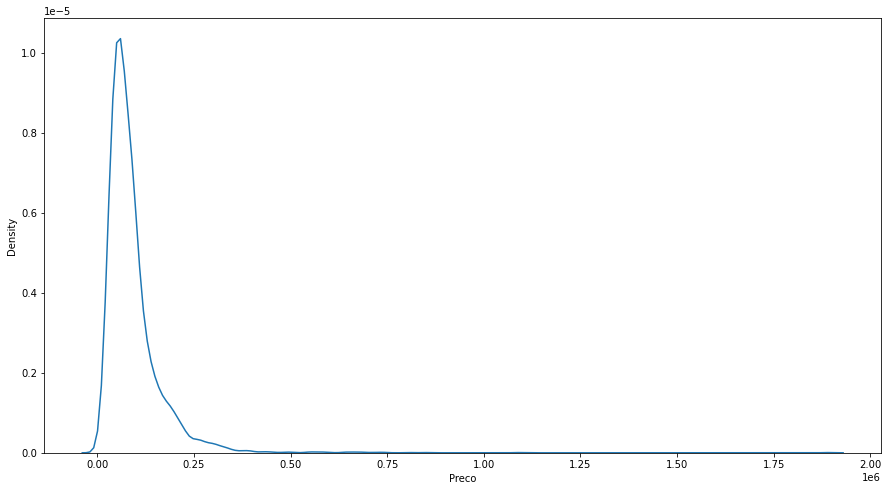

In [10]:
plt.figure(figsize=(15,8))
sns.kdeplot(x=df['Preco']);

Como o p-valor é menor que 0,05, a hipótese nula deve ser rejeitada e portanto assumimos que a amostra não segue uma distribuição normal. Sendo assim, o teste de Mann-Whitney deverá ser aplicado. A hipótese nula desse teste é de que não existe uma diferença significativa nas distribuições das amostras, o que será rejeitado para um nível de significância de 0,05.

In [11]:
from scipy.stats import mannwhitneyu

for var in var_bool:
    stats, pvalue = mannwhitneyu(df.loc[df[var]==False]['Preco'], df.loc[df[var]==True]['Preco'])
    print(var+', p-valor: '+str(pvalue))

ArCondicionado, p-valor: 0.29181778410537207
AirBag, p-valor: 2.678914130040531e-23
Alarme, p-valor: 0.00040898421589675445
TravaEletrica, p-valor: 0.7534921251865744
VidroEletrico, p-valor: 0.9116522122274372
Som, p-valor: 1.4204090601904075e-05
SensorDeRe, p-valor: 7.218459871122959e-79
CameraDeRe, p-valor: 2.7341490880030243e-149
Blindado, p-valor: 3.70689199637953e-09


Segundo o teste de Mann-Whitney, as diferenças observadas para os itens `ArCondicionado`, `TravaEletrica` e `VidroEletrico` não são estatisticamente significativas. Tal confirmação é importante pois o resultado anterior indicava o contrário do esperado em uma situação real. O som do veículo é o único item dessa sessão para o qual se provou uma diferença estatística, porém esse também é um item extremamente popular, o que reforça a hipótese levantada.

## Features categóricas

In [12]:
var_obj = df.select_dtypes(['object']).columns

len(var_obj)

13

A feature `Descricao` será removida da base por apresentar uma variância muito grande:

In [13]:
var_obj = list(var_obj)
var_obj.remove('Descricao')

### Features categóricas binárias

In [14]:
var_obj_bin = ['Portas', 'UnicoDono', 'AceitaTrocas']
var_obj_multi = [x for x in var_obj if x not in var_obj_bin]

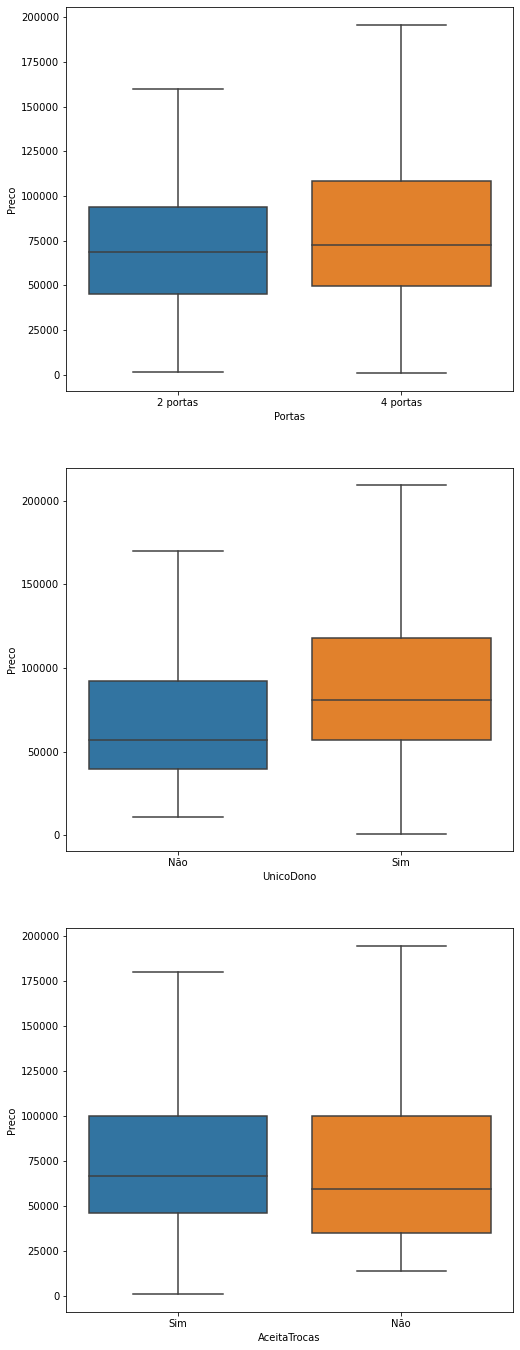

In [15]:
fig, axes = plt.subplot_mosaic(np.reshape(var_obj_bin, (len(var_obj_bin),1)), figsize=(8,8*len(var_obj_bin)))

for var in var_obj_bin:
    sns.boxplot(x=df[var],y=df['Preco'], showfliers=False, ax=axes[var]);

Dos gráficos acima, é possível levantar as seguintes suposições:

- Carros com 4 portas são levemente mais caros que carros com duas portas;
- Carros com um único dono tem preço de venda significativamente maior;
- O fato do vendendor aceitar ou não trocas não impacta no preço do automóvel.

Novamente, o teste de Mann-Whitney será aplicado:

In [16]:
for var in var_obj_bin:
    values = [x for x in df[var].unique() if str(x) != 'nan']
    stats, pvalue = mannwhitneyu(df.loc[df[var]==values[0]]['Preco'], df.loc[df[var]==values[1]]['Preco'])
    print(var+', p-valor: '+str(pvalue))

Portas, p-valor: 0.0033810701935384356
UnicoDono, p-valor: 2.5114265584703267e-49
AceitaTrocas, p-valor: 0.003908042905556832


Dado que a hipótese nula foi rejeitada para todos os testes, é possível dizer que as diferenças observadas acima são estatisticamente significativas. Logo, o fato do vendedor aceitar ou não trocas também interfere no valor do veículo.

### Features categóricas multiclasse

In [17]:
for var in var_obj_multi:
    print(var+', número de categorias: '+str(len(df[var].unique())))

Marca, número de categorias: 40
Tipo, número de categorias: 10
UF, número de categorias: 27
Potencia, número de categorias: 13
Combustivel, número de categorias: 8
Cambio, número de categorias: 4
Direcao, número de categorias: 5
Cor, número de categorias: 11
Modelo, número de categorias: 312


Um dos desafios para a análise é o grande número de categorias em cada uma das variáveis. Seria interessante reduzir esse número o tanto quanto possível. Em um primeiro momento, serão analisadas até as cinco categorias mais frequentes de cada feature.

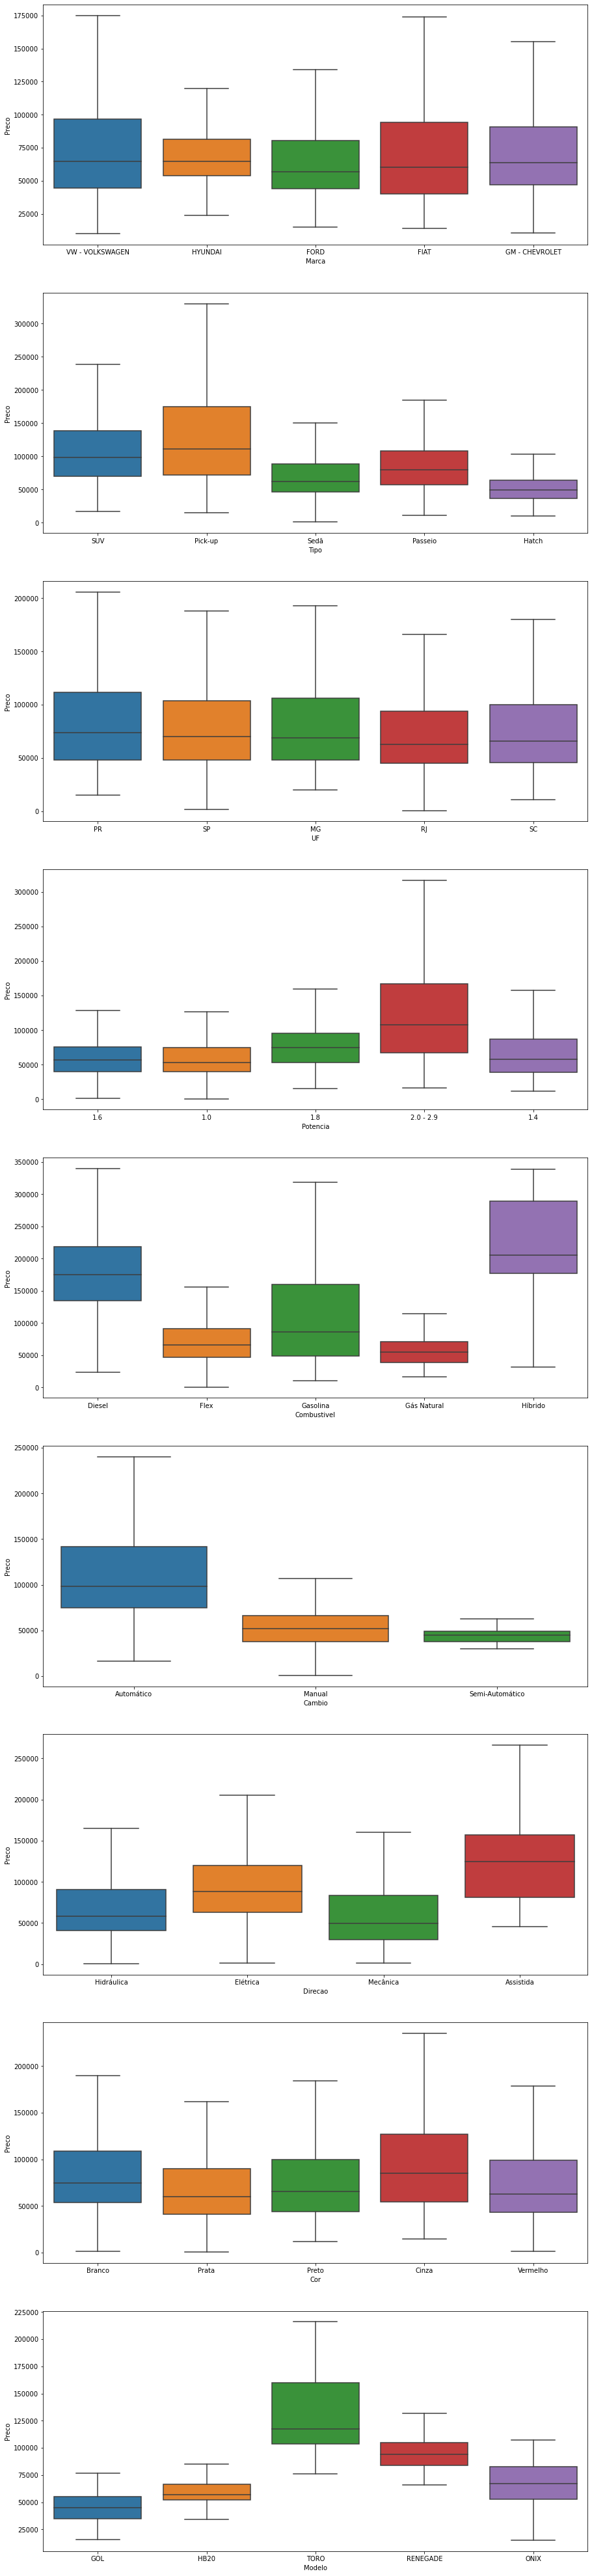

In [18]:
fig, axes = plt.subplot_mosaic(np.reshape(var_obj_multi, (len(var_obj_multi),1)), figsize=(15,8*len(var_obj_multi)))

for var in var_obj_multi:
    top_5 = df[var].value_counts()[:5].index
    sns.boxplot(x=df.loc[df[var].isin(top_5)][var],y=df['Preco'], showfliers=False, ax=axes[var]);

A partir dos gráficos acima, é possível obter as seguintes conclusões:

- A marca do carro não parece influenciar fortemente o preço do veículo nas cinco categorias mais populares;
- Os automóveis do tipo pick-up parecem ser mais caros que os demais, enquanto os carros do tipo hatch parecem ser mais baratos;
- A unidade federal ao qual o carro pertence não parece impactar no preço do mesmo;
- Quanto maior a potência do carro, maior o preço do mesmo;
- Veículos movidos à diesel ou híbridos são mais caros que os demais;
- Os automóveis com câmbio automático são mais caros do que aqueles com câmbio manual;
- Os carros com direção assistida ou elétrica possuem preço maior que os demais, enquanto os veículos com direção mecânica possuem preço menor;
- Veículos na cor cinza apresentam um preço superior àqueles de outras categorias;
- Entre os cinco modelos mais vendidos, o Toro possui o maior preço, enquanto o Gol apresenta o menor preço.

Novamente, um teste estatístico deverá ser aplicado para validar as observações acima. Como as variáveis independentes possuem mais de duas categorias cada, o teste não-paramétrico mais adequado é o de Kruskal-Wallis. A hipótese nula desse teste é de que não existe diferença entre as distribuições. 

In [19]:
from scipy.stats import kruskal

for var in var_obj_multi:
    top_5 = df[var].value_counts()[:5].index
    if len(top_5)==3:
        stats, pvalue = kruskal(df.loc[df[var]==top_5[0]]['Preco'], df.loc[df[var]==top_5[1]]['Preco'], 
                                df.loc[df[var]==top_5[2]]['Preco'])
    elif len(top_5)==4:
        stats, pvalue = kruskal(df.loc[df[var]==top_5[0]]['Preco'], df.loc[df[var]==top_5[1]]['Preco'], 
                                df.loc[df[var]==top_5[2]]['Preco'], df.loc[df[var]==top_5[3]]['Preco'])
    else:
        stats, pvalue = kruskal(df.loc[df[var]==top_5[0]]['Preco'], df.loc[df[var]==top_5[1]]['Preco'], 
                                df.loc[df[var]==top_5[2]]['Preco'], df.loc[df[var]==top_5[3]]['Preco'],
                                df.loc[df[var]==top_5[4]]['Preco'])
    
    print(var+', p-valor: '+str(pvalue))

Marca, p-valor: 0.0002794888353644396
Tipo, p-valor: 6.45725569715637e-212
UF, p-valor: 0.004003741016544214
Potencia, p-valor: 4.359108643340451e-136
Combustivel, p-valor: 1.5868215565590078e-243
Cambio, p-valor: 0.0
Direcao, p-valor: 1.1723374208679343e-87
Cor, p-valor: 1.2479481652268601e-25
Modelo, p-valor: 1.1869677449827124e-104


Os testes apontam para uma diferença estatisticamente significativa entre grupos de todas as features categóricas. Sendo assim, até mesmo nas features de marca e unidade federal o preço varia de acordo com a categoria.

# Analisando a relação entre features

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5212 entries, 0 to 5211
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Marca           5207 non-null   object 
 1   Descricao       5212 non-null   object 
 2   Tipo            4288 non-null   object 
 3   Ano             5212 non-null   int64  
 4   UF              5212 non-null   object 
 5   Km              5212 non-null   int64  
 6   Potencia        3964 non-null   object 
 7   Combustivel     5162 non-null   object 
 8   Cambio          5183 non-null   object 
 9   Direcao         4094 non-null   object 
 10  Cor             4327 non-null   object 
 11  FinalDePlaca    4433 non-null   float64
 12  Portas          5067 non-null   object 
 13  UnicoDono       2962 non-null   object 
 14  AceitaTrocas    3357 non-null   object 
 15  ArCondicionado  5212 non-null   bool   
 16  AirBag          5212 non-null   bool   
 17  Alarme          5212 non-null   b

Nessa etapa, algumas perguntas a respeito do problema serão levantadas e em seguida respondidas através de análises das relações entre features:

- **Existe alguma relação entre a marca do veículo e o tipo do mesmo?**

Nem todas as montadoras produzem todo o tipo de carro. Algumas são especializadas em SUVs, enquanto outras produzem carros mais populares, em geral do tipo hatch. Veremos abaixo se essa observação é confirmada pelos dados disponíveis:

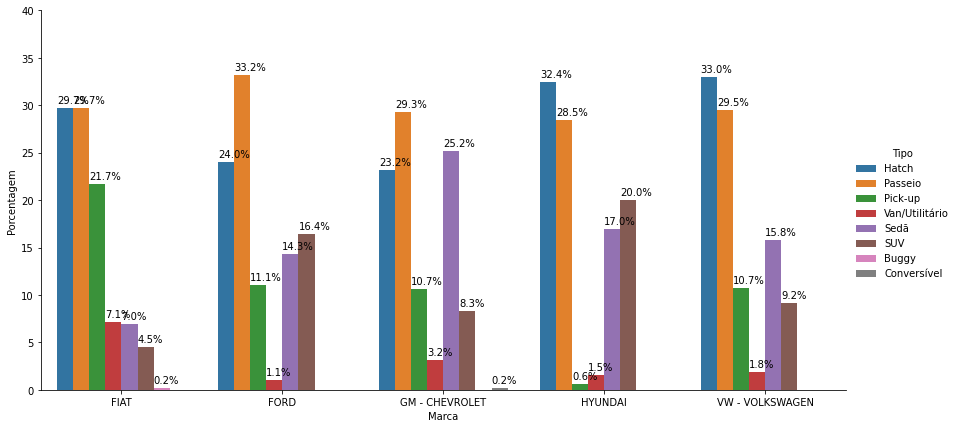

In [21]:
top_5 = df['Marca'].value_counts()[:5].index
df_cat = df.loc[df['Marca'].isin(top_5)].groupby('Marca')['Tipo'].value_counts(normalize=True)
df_cat = df_cat.mul(100)
df_cat = df_cat.rename('Porcentagem').reset_index()

g = sns.catplot(x='Marca', y='Porcentagem', hue='Tipo', kind='bar', data=df_cat, height=6, aspect=2)
g.ax.set_ylim(0,40)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()+0.5
    if not math.isnan(txt_y):
        g.ax.text(txt_x,txt_y,txt)

- Existe uma maior proporção de pick ups pertencentes à marca FIAT, e uma menor proporção pertencente à marca HYUNDAI;
- Existe uma maior proporção de vans/utilitários pertencentes à marca FIAT;
- Existe uma maior proporção de sedãs pertencentes à marca GM - CHEVROLET;
- Existe uma menor proporção de SUVs pertencentes à marca FIAT.

- **Existe alguma relação entre a marca do veículo e sua unidade federal?**

Em certos estados uma marca pode ser mais popular e em outros menos. Abaixo veremos se essa relação é identificável a partir dos dados disponíveis:


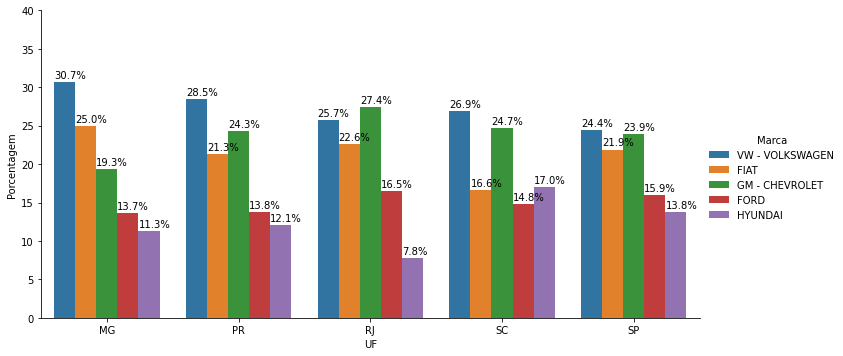

In [22]:
top_5 = df['Marca'].value_counts()[:5].index
top_5_uf = df['UF'].value_counts()[:5].index
df_cat = df.loc[(df['Marca'].isin(top_5))&((df['UF'].isin(top_5_uf)))].groupby('UF')['Marca'].value_counts(normalize=True)
df_cat = df_cat.mul(100)
df_cat = df_cat.rename('Porcentagem').reset_index()

g = sns.catplot(x='UF', y='Porcentagem', hue='Marca', kind='bar', data=df_cat, height=5, aspect=2)
g.ax.set_ylim(0,40)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()+0.5
    if not math.isnan(txt_y):
        g.ax.text(txt_x,txt_y,txt)

Olhando para os cinco estados com mais veículos e as cinco marcas mais frequentes, não foi possível identificar uma diferença significativa na escolha da marca de acordo com a unidade federal.

- **Existe alguma relação entre a marca do veículo e a potência do mesmo?**

Algumas montadoras produzem carros mais potentes, esportivos, enquanto outras atendem outros nichos, com carros de passeio. Veremos abaixo se isso é confirmado pelos dados. Para facilitar as visualizações, será criada uma variável com valor da potência em formato float. Para os casos em que a potência é dada por um intervalo, como em "2.0 - 2.9", será considerado o valor mediano do mesmo, nesse exemplo, "2.5".

In [23]:
df['PotenciaNum'] = df['Potencia'].replace({'2.0 - 2.9':'2.5', '3.0 - 3.9': '3.5', '4.0 ou mais': '4.0'}).astype('float')

df.head()

,Marca,Descricao,Tipo,Ano,UF,Km,Potencia,Combustivel,Cambio,Direcao,...,VidroEletrico,Som,SensorDeRe,CameraDeRe,Blindado,Preco,Modelo,Dias,KmLimite,PotenciaNum
0,ALFA ROMEO,ALFA ROMEO 156 TS/SPORT/ELEGANT 2.0 16V,NaN,2012,AM,1,NaN,NaN,NaN,NaN,...,False,False,False,False,False,50000.0,156,4021,1407350,NaN
1,JEEP,JEEP COMPASS LONGITUDE 2.0 4X4 DIES. 16V AUT.,SUV,2017,DF,0,NaN,Diesel,Automático,NaN,...,True,True,True,True,False,139800.0,COMPASS,2194,767900,NaN
2,VW - VOLKSWAGEN,VW - VOLKSWAGEN SAVEIRO 1.6 MI/ 1.6 MI TOTAL F...,Pick-up,2014,RS,1,1.6,Flex,Manual,Hidráulica,...,True,True,False,False,False,49900.0,SAVEIRO,3290,1151500,1.6
3,TOYOTA,TOYOTA ETIOS,Sedã,2015,PA,1000,1.5,Flex,Manual,Hidráulica,...,True,True,True,False,False,47900.0,ETIOS,2925,1023750,1.5
4,VW - VOLKSWAGEN,VW - VOLKSWAGEN POLO COMFORT. 200 TSI 1.0 FLEX...,NaN,2021,PR,11139,1.0,Flex,Automático,Hidráulica,...,True,False,True,False,False,98900.0,POLO,733,256550,1.0


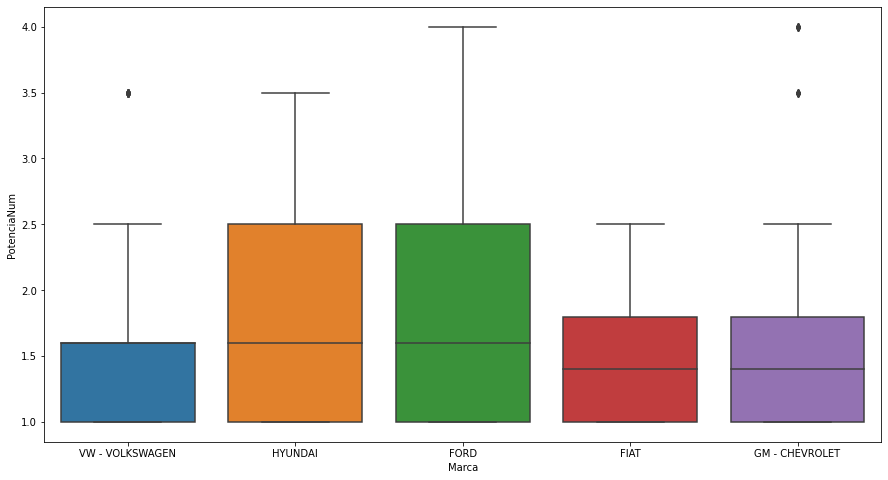

In [24]:
top_5 = df['Marca'].value_counts()[:5].index

plt.figure(figsize=(15,8))
sns.boxplot(x='Marca', y='PotenciaNum', data=df.loc[df['Marca'].isin(top_5)]);

- Enquanto os veículos da VW - VOLKSWAGEN parecem ser os menos potentes, com versões de 1.0 predominantes, os veículos da marca FORD parecem ser aqueles com maior potência, seguidos pelos modelos da HYUNDAI.

- **Existe alguma relação entre o tipo do veículo e a quilometragem do mesmo?**

Os consumidores podem adquirir tipos de carro específicos para certos propósitos. Como os tipos de uso podem ser diferentes, a quilometragem registrada por esses tipos de carros também pode ser distinta, e isso será verificado através dos dados:

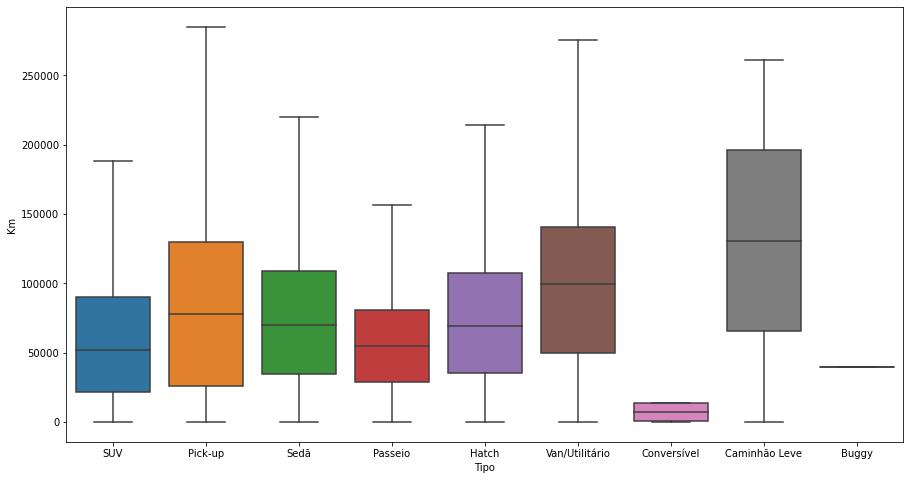

In [25]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Tipo', y='Km', data=df, showfliers=False);

- Os carros do tipo caminhão leve possuem a maior quilometragem dentre as categorias, o que pode ser explicado pelo fato desses veículos serem utilizados para trabalho e entregas;
- Os veículos de passeio possuem baixas quilometragens, o que pode ser explicado pelo tipo de uso mais casual desses automóveis.

- **Existe alguma relação entre o tipo do veículo a potência do mesmo?**

Os carros de algum tipo específico são mais potentes que outros? É provável que a categoria hatch possua maiores variações, agregando desde modelos mais econômicos (1.0) até modelos mais potentes. Por outro lado, é improvável vermos uma pick-up com pouca potência.

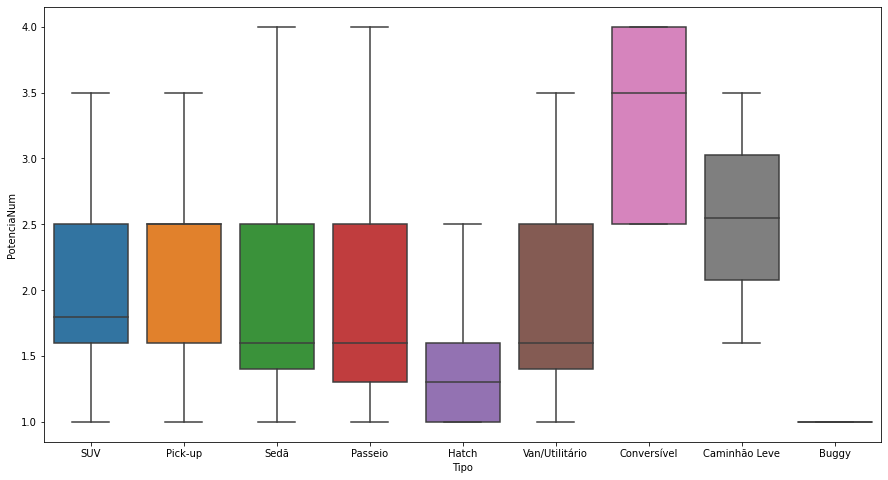

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Tipo', y='PotenciaNum', data=df, showfliers=False);

- Os carros hatch apresentaram a menor potência dentre as categorias;
- Os carros conversíveis apresentaram altas potências, indicando que esses possam ser modelos esportivos;
- Ao contrário do esperado, existem pick-ups com baixa potência (1.0).

- **Existe alguma relação entre o tipo de veículo e o combustível utilizado pelo mesmo?**

É esperado que carros maiores, como pick ups, utilizem mais diesel que os demais. Veremos abaixo quais outras relações podem ser observadas a partir dos dados.

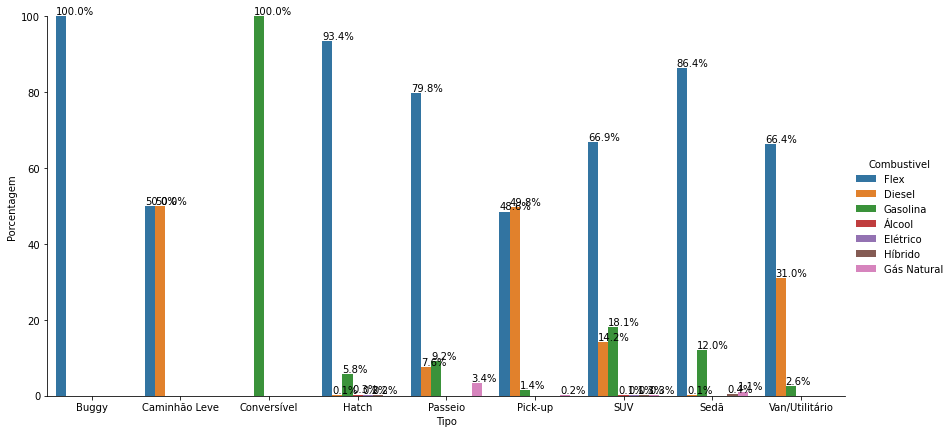

In [27]:
df_cat = df.groupby('Tipo')['Combustivel'].value_counts(normalize=True)
df_cat = df_cat.mul(100)
df_cat = df_cat.rename('Porcentagem').reset_index()

g = sns.catplot(x='Tipo', y='Porcentagem', hue='Combustivel', kind='bar', data=df_cat, height=6, aspect=2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()+0.5
    if not math.isnan(txt_y):
        g.ax.text(txt_x,txt_y,txt)

- O combustível mais utilizado pela grande maioria dos veículos é flex (álcool ou gasolina);
- Conforme esperado, as categorias caminhão leve e pick-up utilizam muito diesel;
- Os conversíveis utilizam apenas gasolina;
- Existe uma proporção maior de veículos movidos à gás natural na categoria passeio.

- **Existe alguma relação entre o ano do veículo e a quilometragem do mesmo?**

É esperado que veículos mais antigos tenham rodado mais quilômetros. Veremos abaixo se essa observação é refletida nos dados disponíveis.

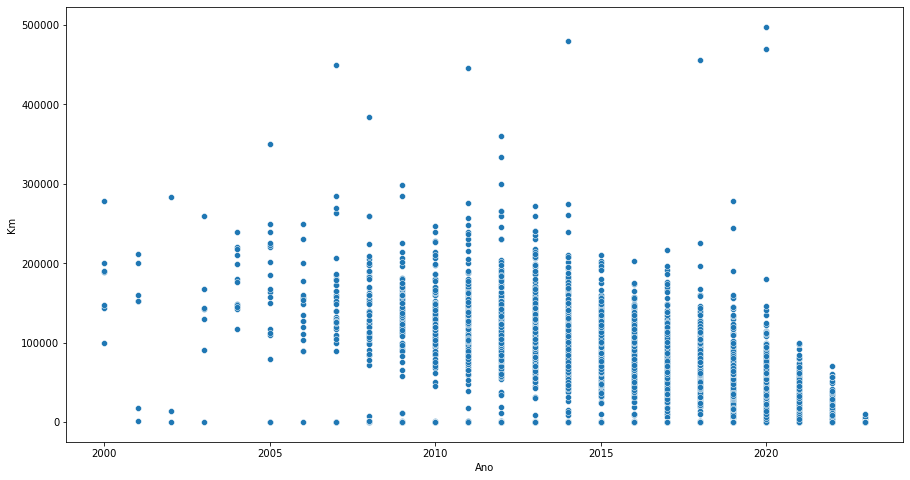

In [28]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Ano', y='Km', data=df.loc[df['Km']<500000]);

In [29]:
df[['Ano','Km']].corr()

,Ano,Km
Ano,1.000000,0.003827
Km,0.003827,1.000000


- Embora a correlação entre as variáveis seja fraca, é possível ver certa tendência descendente de quilometragem conforme o ano do modelo aumenta.

- **Existe alguma relação entre o ano do veículo e o fato desse ter tido um único dono?**

É esperado que veículos mais antigos sejam mais propensos a ter tido mais de um dono. Veremos abaixo se esse fator é observado nos dados.

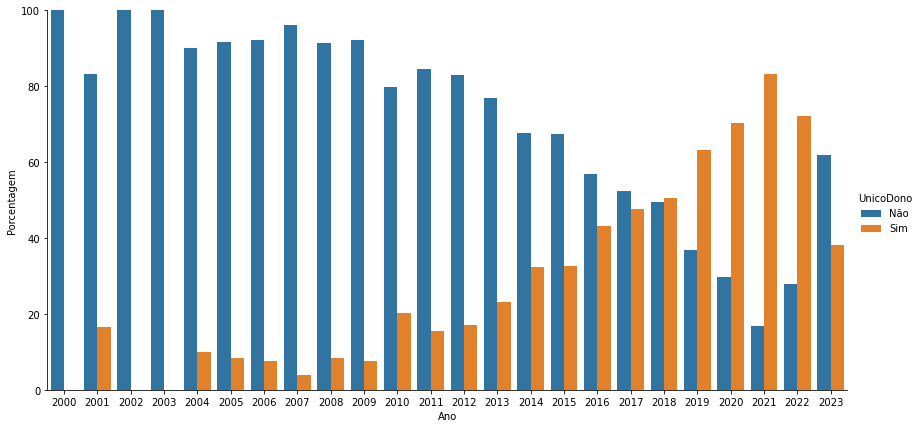

In [30]:
df_cat = df.groupby('Ano')['UnicoDono'].value_counts(normalize=True)
df_cat = df_cat.mul(100)
df_cat = df_cat.rename('Porcentagem').reset_index()

g = sns.catplot(x='Ano', y='Porcentagem', hue='UnicoDono', kind='bar', data=df_cat, height=6, aspect=2)
g.ax.set_ylim(0,100);

- É bastante claro, pelo gráfico acima, que a proporção de veículos com um único dono vai aumentando à medida em que o modelo do carro é mais recente. A exceção fica por conta dos modelos de ano 2023. Nesse caso, isso pode ser explicado pela quantidade absoluta menor de veículos desse ano na base.